In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
assets = ['PG', '^GSPC']
pf_data = pd.DataFrame()
for a in assets:
  pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2020-02-26,120.160004,3116.389893
2020-02-27,113.500000,2978.760010
2020-02-28,113.230003,2954.219971
2020-03-02,119.559998,3090.229980
2020-03-03,118.169998,3003.370117


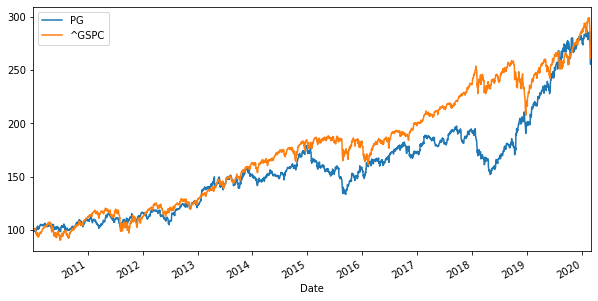

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [0]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [6]:
log_returns.mean() * 250

PG       0.095811
^GSPC    0.095314
dtype: float64

In [7]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.022266,0.011831
^GSPC,0.011831,0.022223


In [8]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.531857
^GSPC,0.531857,1.000000


In [0]:
num_assets = len(assets)

In [10]:
num_assets

2

In [11]:
arr = np.random.random(2)
arr

array([0.57668914, 0.9174009 ])

In [12]:
arr[0] + arr[1]

1.4940900380763433

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.6639997, 0.3360003])

In [14]:
weights[0] + weights[1]

1.0

## Expected Portfolio Return

In [15]:
np.sum(weights * log_returns.mean()) * 250

0.09564400342362177

## Expected Portfolio Variance

In [16]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.01760485437441109

# Expected Portfolio Volatility

In [17]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.13268328596477813

In [18]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  pfolio_returns.append(np.sum(weights * log_returns.mean() * 250))
  pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.09563094, 0.09563896, 0.09532706, 0.09553971, 0.09573287,
        0.09563111, 0.09552582, 0.09556011, 0.09539528, 0.09536236,
        0.09570666, 0.09562693, 0.09565032, 0.0956194 , 0.09574702,
        0.09541758, 0.0957921 , 0.09540753, 0.09554392, 0.09548723,
        0.09557981, 0.0956931 , 0.0955905 , 0.09553014, 0.09535159,
        0.0954088 , 0.09570714, 0.09554159, 0.09563115, 0.09549371,
        0.09567529, 0.09556562, 0.09556002, 0.09563025, 0.09578405,
        0.09577018, 0.09562459, 0.09554715, 0.09546517, 0.09559001,
        0.09548097, 0.09571817, 0.09566899, 0.09545625, 0.09553318,
        0.09538291, 0.09547837, 0.09535587, 0.09569194, 0.0954973 ,
        0.09562944, 0.09565206, 0.09580674, 0.09574585, 0.09538631,
        0.09552538, 0.09556086, 0.09568947, 0.09547005, 0.09553776,
        0.09562483, 0.09569312, 0.09539602, 0.09558701, 0.09567171,
        0.09532785, 0.09560316, 0.0953194 , 0.09573537, 0.09564308,
        0.09574326, 0.09557589, 0.09543537, 0.09

In [0]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_volatilities})

In [20]:
portfolios.head()

,Return,Volatility
0,0.095631,0.132054
1,0.095639,0.132428
2,0.095327,0.147322
3,0.095540,0.130690
4,0.095733,0.139651


In [21]:
portfolios.tail()

,Return,Volatility
995,0.095598,0.130955
996,0.095656,0.133333
997,0.095798,0.147504
998,0.095586,0.130713
999,0.095528,0.130907


Text(0, 0.5, 'Expected Return')

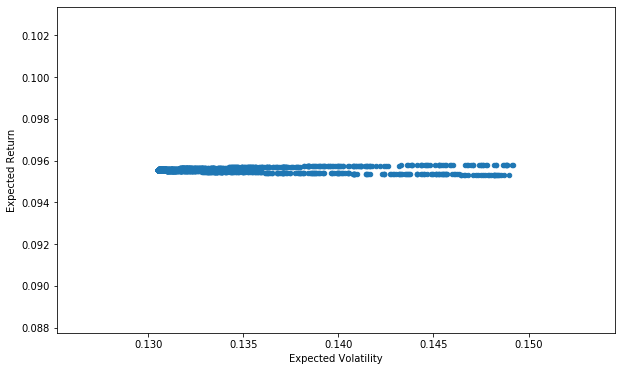

In [22]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')